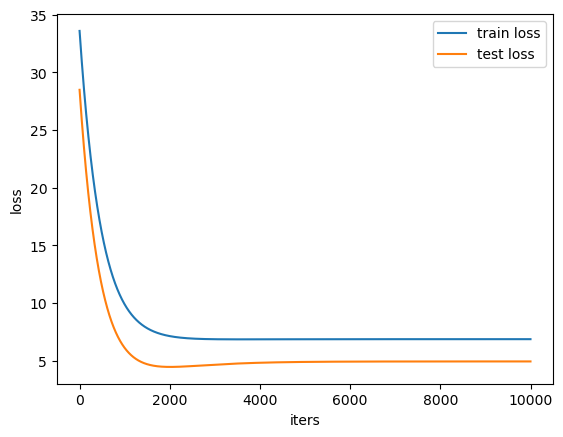

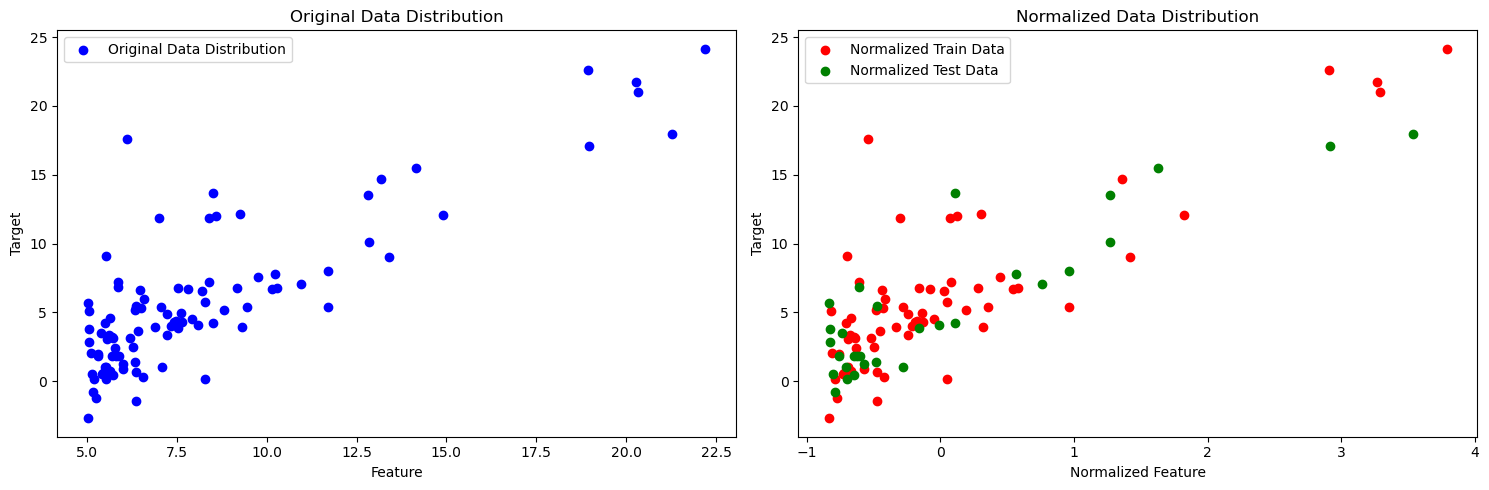

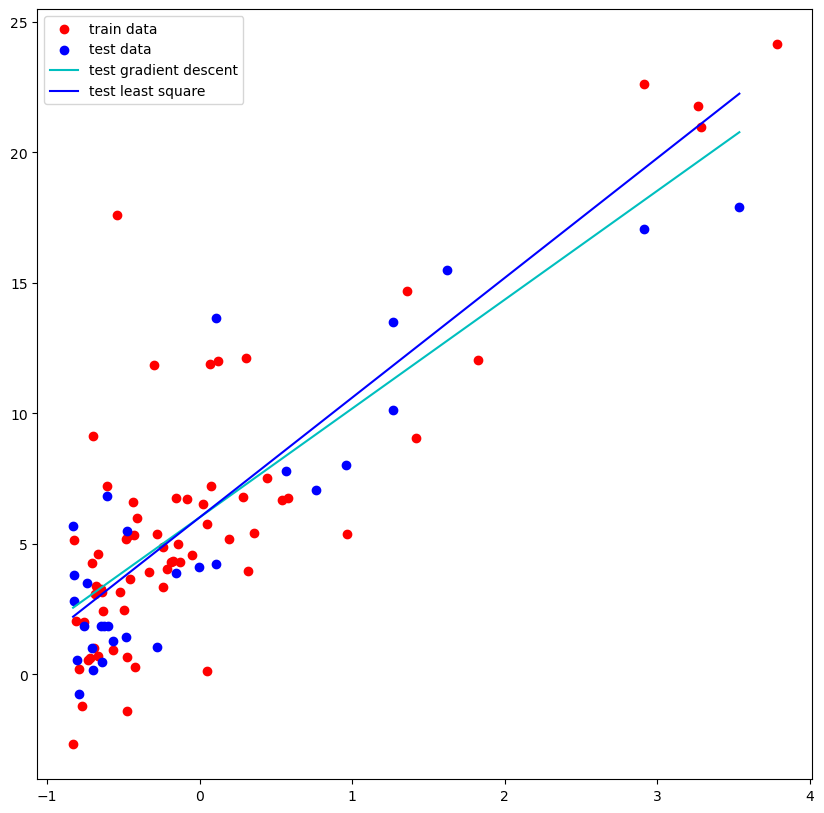

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# 读取数据
path = 'C:/Users/2200170213/Desktop/regress_data1.csv'
data = pd.read_csv(path)
col = data.shape[1]
X_data = data.iloc[:, :col-1]
y_data = data.iloc[:, col-1:]
X = X_data.values
Y = y_data.values

# 数据预处理：归一化处理
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

# 标准化原始数据
x_mean = x_train.mean(axis=0)
x_std = x_train.std(axis=0)
x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

# 初始化模型参数
x_train = np.insert(x_train, 0, 1, axis=1)  # 在第一列插入全1行
x_test = np.insert(x_test, 0, 1, axis=1)

def computeCost(X, Y, W, lambda_reg):
    num_train = X.shape[0]
    Y_hat = X @ W
    loss = np.sum((Y_hat - Y) ** 2) / (2 * num_train)
    reg_loss = lambda_reg * np.sum(W[1:] ** 2)  # 不包括偏置项 W0
    return loss + reg_loss

def gradientDescent(X, Y, W, alpha, lambda_reg):
    num_train = X.shape[0]
    Y_hat = X @ W
    dw = X.T @ (Y_hat - Y) / num_train
    reg_dw = lambda_reg * W
    reg_dw[0] = 0  # 不对偏置项 W0 进行正则化
    W += -alpha * (dw + reg_dw)
    return W

def linearRegression(X, Y, alpha, iters, lambda_reg):
    loss_his = []
    feature_dim = X.shape[1]
    W = np.zeros((feature_dim, 1))  # 初始化W系数矩阵
    for i in range(iters):
        W = gradientDescent(X, Y, W, alpha, lambda_reg)
        w_ = W.copy()
        loss_his.append(w_)
    return loss_his

def predict(X, W):
    y_pre = np.dot(X, W)
    return y_pre

# 训练线性回归模型
alpha = 0.001
iters = 10000
lambda_reg = 0.1
loss_his1 = linearRegression(x_train, y_train, alpha, iters, lambda_reg)
loss_train = [computeCost(x_train, y_train, l, lambda_reg) for l in loss_his1]
loss_test = [computeCost(x_test, y_test, l, lambda_reg) for l in loss_his1]

# 绘制训练和测试损失曲线
iter = np.arange(iters)
plt.plot(iter, loss_train, label='train loss')
plt.plot(iter, loss_test, label='test loss')
plt.legend()
plt.xlabel('iters')
plt.ylabel('loss')
plt.show()

# 使用最小二乘法求解线性回归模型参数
W_lsq = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ y_train

# 绘制原始数据分布图和归一化后的数据分布图
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_data.values[:, 0], y_data.values, c='b', label='Original Data Distribution')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Original Data Distribution')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_train[:, 1], y_train, c='r', label='Normalized Train Data')
plt.scatter(x_test[:, 1], y_test, c='g', label='Normalized Test Data')
plt.xlabel('Normalized Feature')
plt.ylabel('Target')
plt.title('Normalized Data Distribution')
plt.legend()

plt.tight_layout()
plt.show()

# 绘制训练和测试数据点，梯度下降拟合线和最小二乘法拟合线
x_train_0 = np.linspace(x_train.min(), x_train.max(), 100)
y_train_0 = loss_his1[-1][0] + loss_his1[-1][1] * x_train_0
y_lsq_train = W_lsq[0] + W_lsq[1] * x_train_0
x_test_0 = np.linspace(x_test.min(), x_test.max(), 100)
y_test_0 = loss_his1[-1][0] + loss_his1[-1][1] * x_test_0
y_lsq_test = W_lsq[0] + W_lsq[1] * x_test_0

plt.figure(figsize=(10, 10))
plt.scatter(x_train[:, 1], y_train, label='train data', c='r')
plt.scatter(x_test[:, 1], y_test, label='test data', c='b')
plt.plot(x_test_0, y_test_0, label='test gradient descent', c='c')
plt.plot(x_test_0, y_lsq_test, label='test least square', c='b')
plt.legend()
plt.show()